[flaml.tune.tune: 10-28 21:22:11] {519} INFO - Using search algorithm CFO for lexicographic optimization. Note that when providing other search algorithms, we use CFO instead temporarily.
[flaml.tune.tune: 10-28 21:22:11] {805} INFO - trial 1 config: {'rec': 0.86, 'reg': 9.499999999999999e-05, 'ratio5_epochs': 21}
   1  acc=85.8643  epoch=159
[flaml.tune.tune: 10-29 00:13:25] {805} INFO - trial 2 config: {'rec': 0.8531359740898591, 'reg': 8.991593033810048e-05, 'ratio5_epochs': 25}
   2  acc=85.2936  epoch=188
[flaml.tune.tune: 10-29 03:04:13] {805} INFO - trial 3 config: {'rec': 0.7826064708370203, 'reg': 0.00011281716523174658, 'ratio5_epochs': 18}
   3  acc=86.0748  epoch=141
[flaml.tune.tune: 10-29 05:55:44] {805} INFO - trial 4 config: {'rec': 0.86, 'reg': 9.499999999999995e-05, 'ratio5_epochs': 21}
   4  acc=85.8643  epoch=159
[flaml.tune.tune: 10-29 08:46:20] {805} INFO - trial 5 config: {'rec': 0.7582365756134386, 'reg': 0.00010167546102341017, 'ratio5_epochs': 22}
   5  acc=85

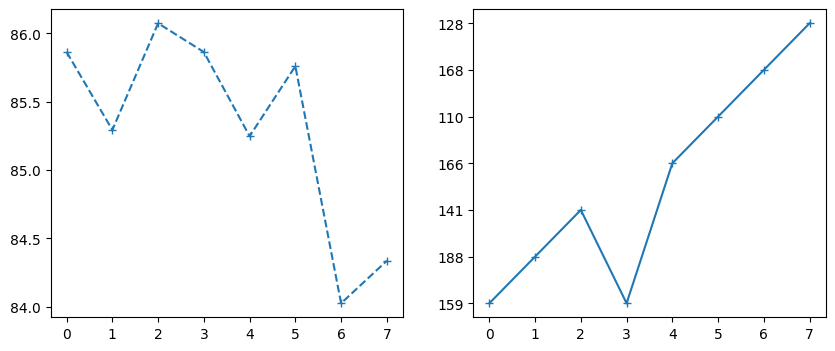

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

txt="sun397.txt"
txt='pc_G1_2.txt'
# txt='cal.txt'
# txt='sdogs.txt'

idx,acc,epoch=[],[],[]
# 打开文件以读取
with open(txt, "r") as file:
    lines = file.readlines()
flag = True
for line in lines:
    if line.startswith("[") :
        print(line, end='')
        flag=True
        id = re.findall(r'trial (\d+)', line)
        if id:
            idx.append(id[0])
    elif  flag == True and line.startswith("***"):
        # print(line, end='')
        flag = False
        tacc,tepoch = re.findall(r'\d+\.\d+|\d+', line)
        acc.append(tacc)
        epoch.append(tepoch)
        if id:
            id=id[0]
            print(f'{id:>4}  acc={float(tacc):.4f}  epoch={tepoch:>3}')

x=np.array([i for i in range(len(acc))])
acc=[float(i) for i in acc]
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x,acc, marker='+',linestyle='--')
plt.subplot(122)
plt.plot(x,epoch, marker='+',linestyle='-')
plt.show()

